# LOGISTIC REGRESSION

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
import pandas as pd
import seaborn as sns

np.random.seed(42)

%matplotlib inline

In [35]:
df=pd.read_csv("titanic.csv")

In [36]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<AxesSubplot:>

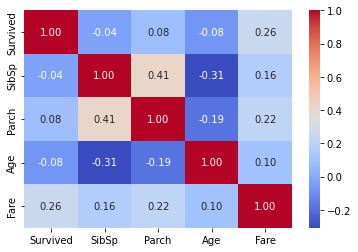

In [37]:
sns.heatmap(df[['Survived', 'SibSp', 'Parch', 'Age', 'Fare']].corr(), annot = True, fmt = '.2f', cmap = 'coolwarm')


<AxesSubplot:xlabel='Embarked'>

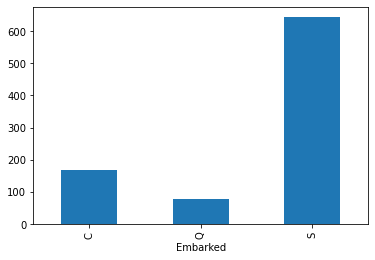

In [38]:
df.groupby('Embarked').size().plot(kind='bar')


In [39]:
df['Embarked'].fillna('S', inplace=True)
df['Embarked'].isna().sum()

0

In [40]:
age_mean=df["Age"].mean()
df["Age"].fillna(age_mean,inplace=True)
df["Age"].isna().sum()

0

In [41]:
#dummies=pd.get_dummies(df.loc[:,["Sex","Embarked"]])

#df[dummies.columns] = dummies
df["Sex"] = df["Sex"].astype("category")
df["Sex"] = df["Sex"].cat.codes
df["Embarked"] = df["Embarked"].astype("category")
df["Embarked"] = df["Embarked"].cat.codes
df.drop(["Cabin","PassengerId","Name","Ticket"],axis=1,inplace=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,2
1,1,1,0,38.000000,1,0,71.2833,0
2,1,3,0,26.000000,0,0,7.9250,2
3,1,1,0,35.000000,1,0,53.1000,2
4,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2
887,1,1,0,19.000000,0,0,30.0000,2
888,0,3,0,29.699118,1,2,23.4500,2
889,1,1,1,26.000000,0,0,30.0000,0


In [42]:
train=df.sample(frac=0.8)
test=df.drop(train.index)

train_y=train["Survived"].to_numpy()
train_x=train.drop(["Survived"],axis=1).to_numpy()
test_y=test["Survived"].to_numpy()
test_x=test.drop(["Survived"],axis=1).to_numpy()


In [43]:
train_y=np.reshape(train_y,(train_y.size,1))
test_y=np.reshape(test_y,(test_y.size,1))


In [44]:
bias_col = np.ones(shape=(train_x.shape[0], 1))
train_x = np.hstack((bias_col, train_x))
bias_col = np.ones(shape=(test_x.shape[0], 1))

test_x=np.hstack((bias_col, test_x))
train_x.shape

(713, 8)

In [45]:
class LogisticRegression:
    def __init__(self,features,samples : int):
        self.features=features
        self.theta=np.zeros((self.features,1))
        self.learning_rate=0.01
        self.samples=samples
        self.bias=0
        
    def sigmoid(self,z:np.ndarray):
        sig=1/(1+(np.exp(-z)))
        return sig
    
    def linear_transfrom(self,x : np.ndarray):
        #print(self.bias,self.theta.shape,x.shape)
        z=np.dot(x,self.theta)
        z+=self.bias
        return self.sigmoid(z)    
    
    
    
    def cross_entropy(self,w,y):
        epsilon=1e-6
        y_0=(1-y)*(np.log(1-w+epsilon))
        y_1=(y)*(np.log(w+epsilon))
        
        cost=np.sum(-y_0-y_1)
        cost=cost/self.samples
        return cost
    
    def grad_descent(self,x:np.ndarray,y:np.ndarray,predicted:np.ndarray):
        z=y-predicted
        z1=-(1/self.samples)*np.dot(x.T,z)
        self.theta-=self.learning_rate*z1
        self.bias-=self.learning_rate*np.sum(z)

        
        
    def train(self,x,y,n=1000):
        losses=[]
        for i in range(n):
            predicted=self.linear_transfrom(x)
            losses.append(self.cross_entropy(predicted,y))
            self.grad_descent(x,y,predicted)
        return losses
    def predict(self,x):
        print(self.bias.shape,self.theta.shape,x.shape)
        z=self.linear_transfrom(x)
        return np.where(z>=0.5,1,0)

In [46]:
class LogisticRegression1:
    def __init__(self,features,samples : int):
        self.features=features
        self.theta=np.ones((self.features,1))
        self.learning_rate=0.01
        self.samples=samples
        
    def sigmoid(self,z:np.ndarray):
        sig=(np.exp(-z))
        sig=1/(1+sig)
        return sig
    
    def predict(self,x : np.ndarray):
        #print(self.bias,self.theta.shape,x.shape)
        z=np.dot(x,self.theta)
        return self.sigmoid(z)   
    
    
    
    def cross_entropy(self,w,y):
        epsilon=0
        y_0=(1-y)*(np.log(1-w+epsilon))
        y_1=(y)*(np.log(w+epsilon))
        
        cost=np.sum(y_0+y_1)
        cost=-cost/self.samples
        return cost
    
    def grad_descent(self,x:np.ndarray,y:np.ndarray,predicted:np.ndarray):
        z=y-predicted
        z1=(-1)*(1/self.samples)*np.dot(x.T,z)
        self.theta-=self.learning_rate*z1

        
        
    def train(self,x,y,n=1000):
        losses=[]
        for i in range(n):
            predicted=self.predict(x)
            losses.append(self.cross_entropy(predicted,y))
            self.grad_descent(x,y,predicted)
        return losses
    def evaluate(self,x):
        z=self.predict(x)
        return np.where(z>0.5,1,0)

In [47]:
model=LogisticRegression1(train_x.shape[1],train_x.shape[0])

/tmp/ipykernel_32485/4104849002.py:22: RuntimeWarning: divide by zero encountered in log
  y_0=(1-y)*(np.log(1-w+epsilon))
/tmp/ipykernel_32485/4104849002.py:22: RuntimeWarning: invalid value encountered in multiply
  y_0=(1-y)*(np.log(1-w+epsilon))


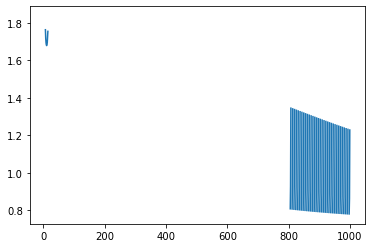

In [48]:
loss=model.train(train_x,train_y)
plt.plot(loss)

In [49]:
k=model.evaluate(test_x)
loss

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 1.7642655029696288,
 1.7186248006005334,
 1.6945530797630843,
 1.6833839339661731,
 1.679447010838757,
 1.6844838428926177,
 1.6947669578597393,
 1.7297173290358387,
 1.755623992283573,
 nan,
 1.8363206295617678,
 nan,
 1.8222264515415691,
 nan,
 1.7654246508567595,
 nan,
 1.759621896690801,
 nan,
 1.7747653885976091,
 nan,
 1.783076638772725,
 nan,
 1.771433176398869,
 nan,
 1.758839006635937,
 nan,
 1.7562424851024474,
 nan,
 1.7563801409999051,
 nan,
 1.7518648779126664,
 nan,
 1.744743081584221,
 nan,
 1.7400134128113072,
 nan,
 1.7371190608120848,
 nan,
 1.733161383400245,
 nan,
 1.7280291011225062,
 nan,
 1.723537212180806,
 nan,
 1.719895304107699,
 nan,
 1.7159808977010416,
 nan,
 1.7115869348125599,
 nan,
 1.7074541155723,
 nan,
 1.703735702319154,
 nan,
 1.6999256790487587,
 nan,
 1.695917549765879,
 nan,
 1.692074068566509,
 nan,
 1.6884557440480288,
 nan,
 1.6847885285369162,
 nan,
 1.6810418034095096,
 nan,
 1.6774244147795314,
 n

In [50]:
f1_score(k,test_y)

0.5349794238683128

In [51]:
from sklearn.linear_model import LogisticRegression


In [52]:
clf = LogisticRegression(random_state=0).fit(train_x, train_y)

/home/dp/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/dp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [53]:
ll=clf.predict(test_x)

In [54]:
f1_score(ll,test_y)

0.696969696969697

In [55]:
"""Logistic Regression classifier for my Medium Article.
Author: Jacob Bumgarner
Email: jacobbum21@gmail.com
"""

import numpy as np


class LogisticRegression2:
    """A Logistic Regression classifier.
    Args:
        n_input_feature (int): The number of features in the dataset.
    Attributes:
        weights (np.ndarary): The weights of the model
        bias (float): The bias of the model.
        fit (bool): Whether the model has been fit to training data or not. Defaults to
            False.
    """

    def __init__(self, n_input_features: int):
        """Initialize the model."""
        self.weights = np.zeros((n_input_features, 1))  # column matches X rows
        self.bias = np.zeros((1,1))

        self.fit = False  # indicates the training state of the classifier

    def linear_transform(self, X: np.ndarray) -> np.ndarray:
        """Apply a linear transformation to the input data with the weights and bias.
        Args:
            X (np.ndarray): The data to be transformed.
        Returns:
            np.ndarray: The linearly transformed data.
        """

        Z = np.matmul(X, self.weights) + self.bias
        return Z

    def sigmoid(self, Z: np.ndarray) -> np.ndarray:
        """Apply the sigmoid function.
        Args:
            Z (np.ndarray): The linear data to be transformed with the sigmoid function.
        Returns:
            np.ndarray: The sigmoid-transformed data.
        """
        A = 1 / (1 + np.exp(-Z))
        return A

    def compute_cross_entropy_cost(self, A: np.ndarray, Y: np.ndarray) -> float:
        """Compute the model's cross-entropy cost for a labeled dataset.
        Args:
            A (np.ndarray): The projected probabilities for each data point.
            Y (np.ndarray): the target probabilities for each data point.
        Returns:
            float: The cost of the training iteration.
        """
        epsilon = 1e-6  # add the epsilon to prevent divide by zero warnings
        m = Y.shape[0]
        y_0 = (1 - Y) * np.log(1 - A + epsilon)  # where y target == 0
        y_1 = Y * np.log(A + epsilon)  # where y target == 1

        cost_sum = np.sum(-y_0 - y_1)
        cost = cost_sum / m
        return cost

    def backpropagate(
        self,
        X: np.ndarray,
        A: np.ndarray,
        Y: np.ndarray,
        learning_rate=0.01,
    ) -> None:
        """Compute a single backpropagation of the model.
        Args:
            X (np.ndarray): The array containing the training data.
            A (np.ndarray): The the predicted labels.
            Y (np.ndarray): The target labels.
            learning_rate (float, optional): The learning rate of the backprop.
                Defaults to 0.01.
        Returns:
            float: The cost of the iteration.
        """
        # Compute simplified dZ from chain rule product of dA * dZ
        dZ = (A - Y)
        
        # Then compute dW and dB and find the average loss, i.e., cost
        dW = np.mean(dZ * X, axis=0, keepdims=True).T
        dB = np.mean(dZ, axis=0, keepdims=True).T

        self.weights -= dW * learning_rate
        self.bias -= dB * learning_rate
        return

    def train(
        self,
        X: np.ndarray,
        Y: np.ndarray,
        epochs: int = 100,
        learning_rate: float = 0.01,
        minibatch_size: int = 10,
        verbose: bool = False,
    ) -> np.ndarray:
        """Fit the logistic regression model with training data and target labels.
        Uses minibatch gradient descent.
        Args:
            X (np.ndarray): The training dataset.
            Y (np.ndarray): The training dataset targets.
            epochs (int, optional): The number of training iterations. Defaults to 100.
            learning_rate (float, optional): The step size of the descent.
                Defaults to 0.01.
            minibatch_size (int, optional): The size of the minibatch for the stochastic
                gradient descent. If None, runs batch gradient descent. Defaults to 10.
            verbose (bool, optional): _description_. Defaults to False.
        Raises:
            Attribute: Raises error if the model has already been fit.
            ValueError: Raises error if the number of features doesn't match the
                instantiated feature count.
        Returns:
            np.ndarray: The cost history.
        """
        # Check whether the model has been fit.
        if self.fit:
            raise AttributeError("Error: This model has already been fit.")
        self.fit = True

        if not X.shape[-1] == self.weights.shape[0]:
            raise ValueError(
                "The shape of the last axis of the training data must match the shape "
                "of the data used to instantiate the model."
            )

        if Y.ndim == 1:
            Y = np.expand_dims(Y, axis=1)

        # Fit the model
        costs = []
        accuracies = []
        weight_hist, bias_hist = [], []
        for i in range(epochs):
            weight_hist.append(self.weights[:, 0].copy())
            bias_hist.append(self.bias.copy())
            
            # Isolate the minibatch
            if minibatch_size:
                batch_indices = np.random.choice(
                    X.shape[0], size=minibatch_size, replace=False
                )
                X_batch, Y_batch = X[batch_indices], Y[batch_indices]
            else:
                X_batch, Y_batch = X, Y

            # Compute the linear transformation
            Z = self.linear_transform(X_batch)

            # Compute the sigmoid transformation
            A = self.sigmoid(Z)

            # Compute the cost
            cost = self.compute_cross_entropy_cost(A, Y_batch)

            # Then run the backprop
            self.backpropagate(X_batch, A, Y_batch, learning_rate=learning_rate)

            if verbose:
                print(f"Epoch: {i}, Cost: {cost: 0.2f}          ", end="\r")

            costs.append(cost)
            accuracies.append(self.accuracy(self.predict(X), Y[:, 0]))

        if verbose:
            print(f"Final model cost: {cost:0.2f}              ")

        self.fit = True
        return np.array(costs), np.array(accuracies), np.array(weight_hist).T, np.array(bias_hist).T[0, 0]

    def predict(self, X: np.ndarray) -> np.ndarray:
        """Predict the labels for a set of input data.
        Args:
            X (np.ndarray): The data for label predictions.
        Returns:
            np.ndarray: The predictions for each sample.
        """
        if not self.fit:
            raise AttributeError(
                "Error: This classifier has not been fit to any training data."
            )
        Z = self.linear_transform(X)
        A = self.sigmoid(Z)
        return A.T[0]

    def accuracy(self, predictions: np.ndarray, labels: np.ndarray) -> float:
        """Return the accuracy of a dataset prediction.
        Args:
            predictions (np.ndarray): The output predictions from the `predict`
                function.
            labels (np.ndarray): The true labels to compare to the predictions.
        Returns:
            float: The prediction accuracy.
        """
        overlap = (predictions >= 0.5) == labels
        accuracy = overlap.sum() / predictions.shape[0] * 100
        return accuracy

In [56]:
mo=LogisticRegression2(train_x.shape[1])

In [57]:
mo.train(train_x,train_y)

(array([0.69314518, 1.19448891, 2.92343646, 4.0246984 , 1.04598511,
        0.90352598, 2.38283606, 0.48165761, 2.61286393, 2.22531216,
        0.75391422, 1.5707956 , 2.27047562, 0.47260327, 1.56370388,
        0.96221358, 0.85369419, 0.53222199, 0.68307238, 1.14923096,
        1.87624013, 1.0073469 , 2.44528744, 1.22698098, 0.93990875,
        1.88885359, 0.59167749, 0.64847569, 0.39397026, 0.95940729,
        1.45814903, 0.61036369, 0.80647878, 1.05547236, 0.53866929,
        0.91589775, 0.54395675, 0.42457681, 3.02556632, 4.3679393 ,
        5.17167326, 1.96462625, 1.82798553, 1.64431982, 2.12064113,
        3.08862043, 2.95633269, 2.27193022, 0.78126541, 0.88917733,
        4.02003469, 3.07332947, 1.65654623, 1.03282094, 0.70222963,
        0.40051013, 0.54184112, 0.74242343, 0.61360022, 0.99068637,
        0.67119586, 0.60430137, 1.43982731, 3.22684139, 1.91861798,
        2.10876623, 1.32602699, 1.11278304, 1.11798229, 2.3193152 ,
        5.20160511, 0.71837549, 0.88418344, 1.76

In [58]:
k=mo.predict(test_x)
k=np.where(k>0.5,1,0)

In [59]:
f1_score(k,test_y)

0.5694444444444443